# cartopy maps

You might be slightly disappointed with your map plots so far. They all look the same and you can't use any fancy projections to stand out. We are going to change this now with the `cartopy` package. And it is really easy to implement!

## From matplotlib's `axes` to cartopy's `GeoAxes`
Let's recall how we created a figure so far with `matplotlib`:

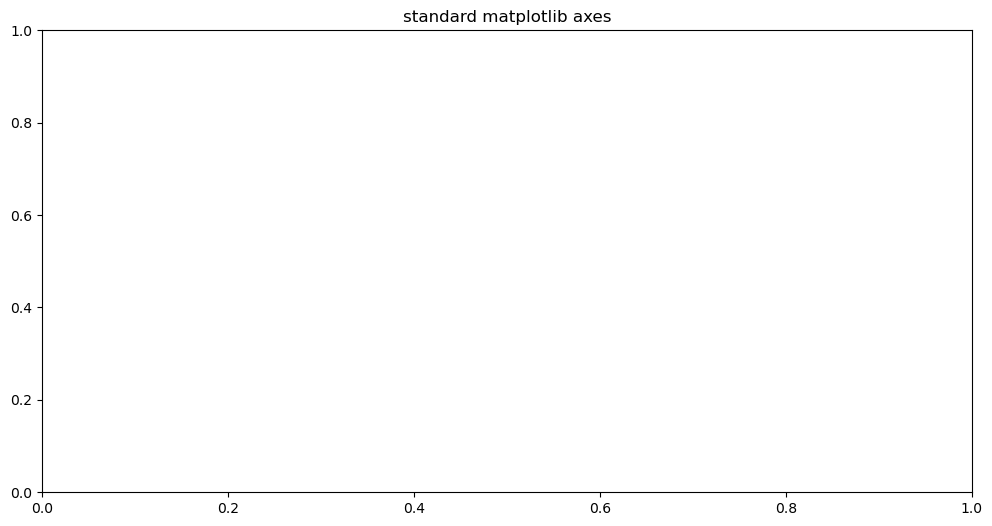

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

fig, ax = plt.subplots()
ax.set_title("standard matplotlib axes");

`cartopy` now allows us to load any projection from its coordinate reference system class `ccrs` and *georeference* the `axes` to become a `GeoAxes`.

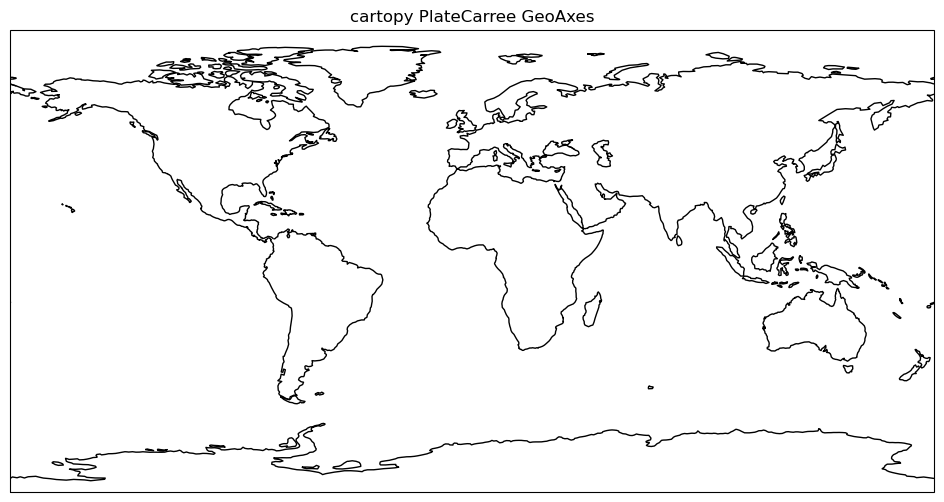

In [2]:
from cartopy import crs as ccrs

fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
# ax is now of type GeoAxes with some helpful options like adding coastlines
ax.coastlines()
ax.set_title("cartopy PlateCarree GeoAxes");

we can easily add some more shapefiles to quickly produce nice maps

## cartopy projections
Changing the projection in `cartopy` is as easy as just importing a different projection name from the ccrs class. 

A list of available projections and examples is available at https://scitools.org.uk/cartopy/docs/latest/reference/projections.html.

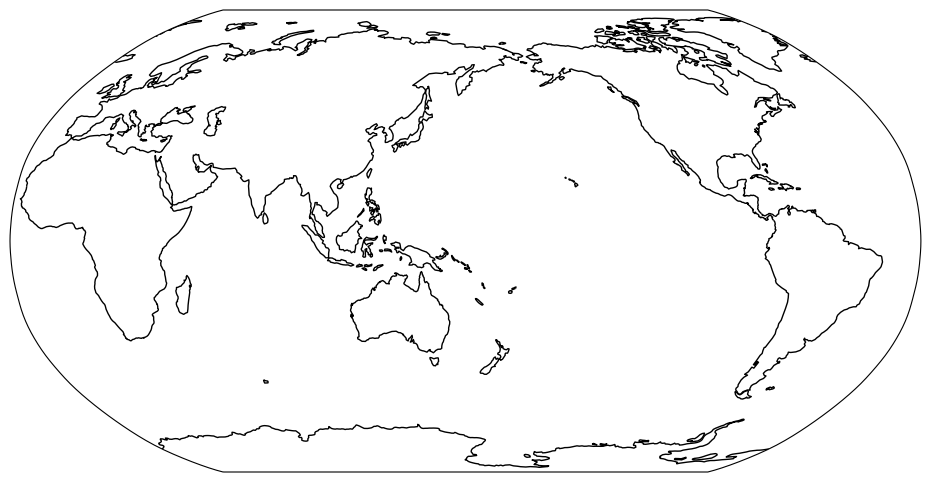

In [3]:
# it is common practice to save the projection as an object first so we can use it multiple times
crs = ccrs.Robinson(central_longitude=160)

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.coastlines()

easily add a stock background image:

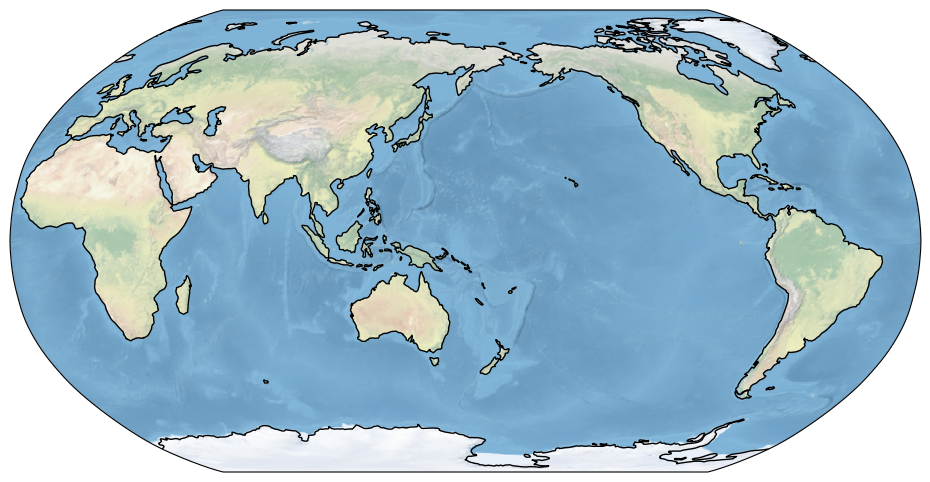

In [5]:
crs = ccrs.Robinson(central_longitude=160)

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.coastlines()
ax.stock_img()

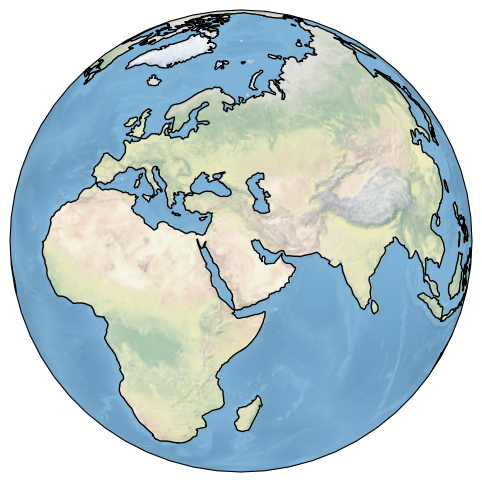

In [6]:
crs = ccrs.Orthographic(central_longitude=45, central_latitude=30)

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.coastlines()
ax.stock_img()

## regional maps
We can zoom in on any map with the [.set_extent()](https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/geoaxes.html) method for any GeoAxes. The extent needs to be specified as (x0, x1, y0, y1).

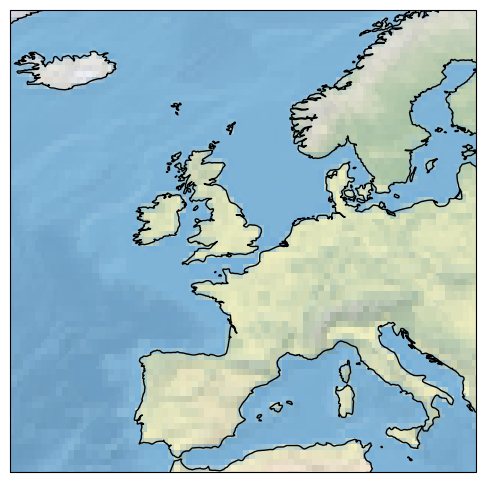

In [7]:
crs = ccrs.Robinson()

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.coastlines()
ax.stock_img()

# need to specify in which crs we specify the extent (here in degrees)
ax.set_extent([-20, 20, 35, 70], crs=ccrs.PlateCarree())


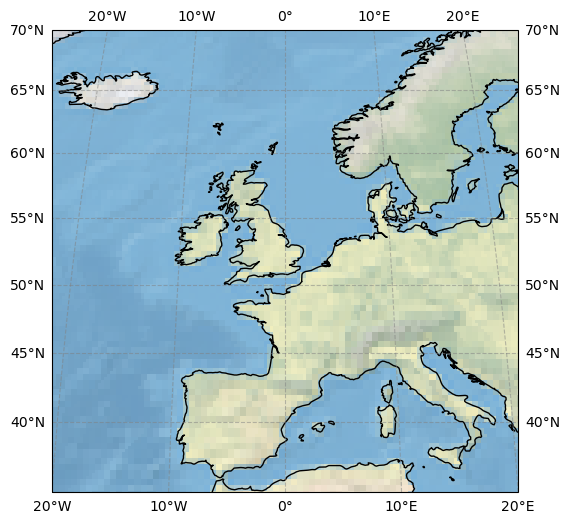

In [8]:
crs = ccrs.Robinson()

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))
ax.coastlines()
ax.stock_img()

# need to specify in which crs we specify the extent (here degrees)
ax.set_extent([-20, 20, 35, 70], crs=ccrs.PlateCarree())

# lets add some labels (this does not always work with all projections)
gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')

## cartopy and xarray
Using `cartopy` projections for our `xarray` plots is also straightforward. The only thing we have to remember is to also specify the projection/crs of our data grid that we want to plot. 

Let's load the CERES satellite exercise data again to demonstrate this:

In [9]:
import xarray as xr
import pooch
fname = pooch.retrieve(
    'http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc',
    known_hash='a876cc7106e7dcb1344fbec5dcd7510e5cd947e62049a8cbc188ad05ffe00345'
)
print(fname)

ds = xr.open_dataset(fname)

/Users/wb19586/Library/Caches/pooch/8e18cca34f0b893a1829cf86ad4b7c49-CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc


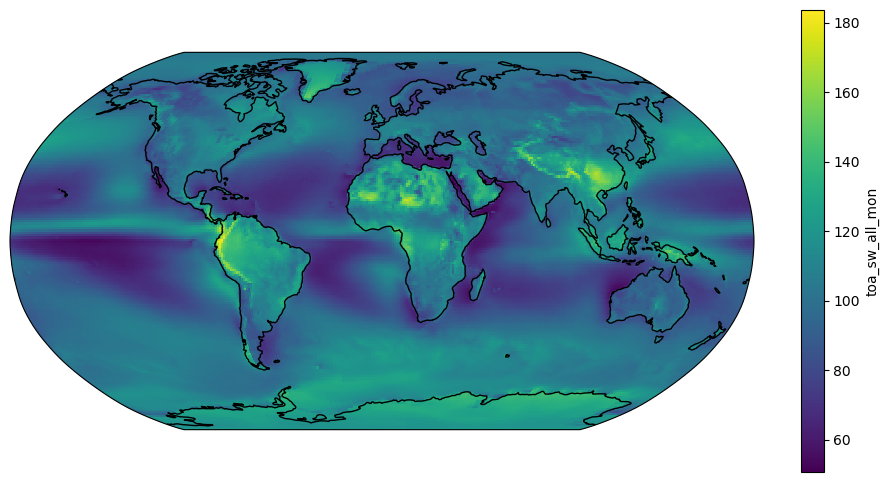

In [25]:
# this is the projection we want to plot
crs = ccrs.Robinson()

# or use the "InterruptedGoodeHomolosine"
#crs2 = ccrs.InterruptedGoodeHomolosine()

fig, ax = plt.subplots(subplot_kw=dict(projection=crs))

# this is the projection of the data grid
ds["toa_sw_all_mon"].mean("time").plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines()

## [[Previous: Xarray exercise](./04-xarray_exercise.ipynb)] | [[Next: Intro to assessment 1](./06-assessment.ipynb)]